# Projekt końcowy Data Science 
### Dorota Gawrońska-Popa 
## 4. Modelowanie 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#import category_encoders as ce

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.ensemble import VotingRegressor

from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, recall_score

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [2]:
# wczytuje dane z poprzedniej części
data_loan = pd.read_csv('data_loan.csv')
data_loan.drop('Unnamed: 0', axis=1, inplace=True)
data_loan

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_mean,last_fico_mean,fico_rating,loan_amnt_rating,interest_rating
0,5000.0,5000.0,1,10.65,162.87,1,10,RENT,24000.0,Verified,...,0.0,13648.0,83.7,9.0,0.0,737.0,737.0,1,1,1
1,2500.0,2500.0,2,15.27,59.83,2,1,RENT,30000.0,Source Verified,...,0.0,1687.0,9.4,4.0,0.0,742.0,249.5,2,2,2
2,2400.0,2400.0,1,15.96,84.33,3,10,RENT,12252.0,Not Verified,...,0.0,2956.0,98.5,10.0,0.0,737.0,737.0,1,2,2
3,10000.0,10000.0,1,13.49,339.31,4,10,RENT,49200.0,Source Verified,...,0.0,5598.0,21.0,37.0,0.0,692.0,602.0,1,3,1
4,3000.0,3000.0,2,12.69,67.79,5,1,RENT,80000.0,Source Verified,...,0.0,27783.0,53.9,38.0,0.0,697.0,682.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,3500.0,1,10.28,113.39,4,1,RENT,180000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,687.0,817.0,1,2,1
42531,1000.0,1000.0,1,9.64,32.11,14,1,RENT,12000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,697.0,782.0,1,2,1
42532,2525.0,2525.0,1,9.33,80.69,13,1,RENT,110000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,712.0,712.0,1,2,3
42533,6500.0,6500.0,1,8.38,204.84,18,1,NONE,60000.0,Not Verified,...,0.0,0.0,49.7,20.0,0.0,742.0,722.0,2,1,3


In [3]:
# wczytuje dane z poprzedniej części
data_loan1 = pd.read_csv('data_loan1.csv')
data_loan1.drop('Unnamed: 0', axis=1, inplace=True)
data_loan1

,annual_inc,installment,int_rate,fico_mean,last_fico_mean,loan_amnt,revol_bal,open_acc,total_acc,loan_status
0,24000.0,162.87,10.65,737.0,737.0,5000.0,13648.0,3.0,9.0,1
1,30000.0,59.83,15.27,742.0,249.5,2500.0,1687.0,3.0,4.0,0
2,12252.0,84.33,15.96,737.0,737.0,2400.0,2956.0,2.0,10.0,1
3,49200.0,339.31,13.49,692.0,602.0,10000.0,5598.0,10.0,37.0,1
4,80000.0,67.79,12.69,697.0,682.0,3000.0,27783.0,15.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...
42530,180000.0,113.39,10.28,687.0,817.0,3500.0,0.0,7.0,20.0,1
42531,12000.0,32.11,9.64,697.0,782.0,1000.0,0.0,7.0,20.0,1
42532,110000.0,80.69,9.33,712.0,712.0,2525.0,0.0,7.0,20.0,1
42533,60000.0,204.84,8.38,742.0,722.0,6500.0,0.0,7.0,20.0,1


In [4]:
# wczytuje dane z poprzedniej części
data_dummies = pd.read_csv('data_dummies.csv')
data_dummies.drop('Unnamed: 0', axis=1, inplace=True)
data_dummies

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,3500.0,1,10.28,113.39,4,1,180000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,1000.0,1,9.64,32.11,14,1,12000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,2525.0,1,9.33,80.69,13,1,110000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,6500.0,1,8.38,204.84,18,1,60000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_dummies.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'loan_status',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_mean',
       'last_fico_mean', 'fico_rating', 'loan_amnt_rating', 'interest_rating',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_va

In [6]:
# wczytuje dane z poprzedniej części
data_outliers = pd.read_csv('data_outliers.csv')
data_outliers.drop('Unnamed: 0', axis=1, inplace=True)
data_outliers

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_mean,last_fico_mean
0,5000.0,5000.0,10.65,162.87,10.0,24000.0,2011.0,27.65,1985.0,1.0,3.0,13648.0,83.7,9.0,737.0,737.0
1,2500.0,2500.0,15.27,59.83,1.0,30000.0,2011.0,1.00,1999.0,5.0,3.0,1687.0,9.4,4.0,742.0,249.5
2,2400.0,2400.0,15.96,84.33,10.0,12252.0,2011.0,8.72,2001.0,2.0,2.0,2956.0,98.5,10.0,737.0,737.0
3,10000.0,10000.0,13.49,339.31,10.0,49200.0,2011.0,20.00,1996.0,1.0,10.0,5598.0,21.0,37.0,692.0,602.0
4,3000.0,3000.0,12.69,67.79,1.0,80000.0,2011.0,17.94,1996.0,0.0,15.0,27783.0,53.9,38.0,697.0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,3500.0,10.28,113.39,1.0,59000.0,2011.0,10.00,2007.0,0.0,7.0,0.0,49.7,20.0,687.0,817.0
42531,1000.0,1000.0,9.64,32.11,1.0,12000.0,2011.0,10.00,2007.0,0.0,7.0,0.0,49.7,20.0,697.0,782.0
42532,2525.0,2525.0,9.33,80.69,1.0,110000.0,2011.0,10.00,2007.0,0.0,7.0,0.0,49.7,20.0,712.0,712.0
42533,6500.0,6500.0,8.38,204.84,1.0,60000.0,2011.0,4.00,2007.0,0.0,7.0,0.0,49.7,20.0,742.0,722.0


## 4. b) Modelowanie dla różnych algorytmów
### Model na całym zbiorze - data_dummies

### Train Test Split

In [7]:
X = data_dummies.drop('loan_status',axis=1) 
#target
Y = data_dummies['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Skalowanie 

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test 

array([[-0.95313026, -0.95140853, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [-1.22287358, -1.23096153, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.31891988, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       ...,
       [ 0.28768898,  0.33453524, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.66532962,  0.72590943,  1.68415002, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299,  0.16680344, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ]])

### Logistic Regression

In [9]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_pred = log.predict(X_test)
    
# Summary of the prediction
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

# Accuracy
print('Training accuracy:', log.score(X_train, y_train))
print('Test accuracy:', log.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.68      0.22      0.34      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.77      0.60      0.63     12761
weighted avg       0.84      0.86      0.83     12761

[[  443  1535]
 [  213 10570]]
Training accuracy: 0.8655874252703701
Test accuracy: 0.863020139487501


In [10]:
auroc_log = roc_auc_score(log_pred,y_test)
print('AUROC =', auroc_log)

AUROC = 0.7742488867732543


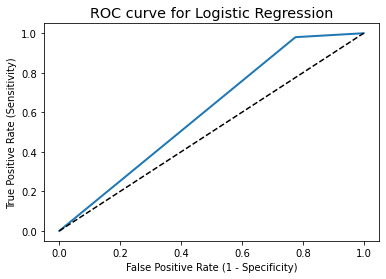

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, log_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Logistic Regression z regularyzacją - 5 parametrów

In [12]:
C = [.001, .01, 10, 100, 1000]

for c in C:
    log1 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    log1.fit(X_train, y_train)
    
    log1_pred = log1.predict(X_test)
    
    # Summary of the prediction
    print(classification_report(y_test, log1_pred))
    print(confusion_matrix(y_test, log1_pred))
    print('')
    print('C:', c)
    # Accuracy
    # print('Coefficient of each feature:', log1.coef_)
    print('Training accuracy:', log1.score(X_train, y_train))
    print('Test accuracy:', log1.score(X_test, y_test))
    print('')
    auroc_lrc = roc_auc_score(log1_pred,y_test)
    print('AUROC =', auroc_lrc)
    print('')

              precision    recall  f1-score   support

           0       0.66      0.08      0.14      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.75      0.53      0.53     12761
weighted avg       0.82      0.85      0.80     12761

[[  150  1828]
 [   79 10704]]

C: 0.001
Training accuracy: 0.8552764156646738
Test accuracy: 0.8505603009168561

AUROC = 0.7545776262549533

              precision    recall  f1-score   support

           0       0.68      0.19      0.29      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.78      0.59      0.61     12761
weighted avg       0.84      0.86      0.83     12761

[[  371  1607]
 [  171 10612]]

C: 0.01
Training accuracy: 0.8638745213945053
Test accuracy: 0.8606692265496434

AUROC = 0.7764926771536311

              precision    recall  f1-score   support

        

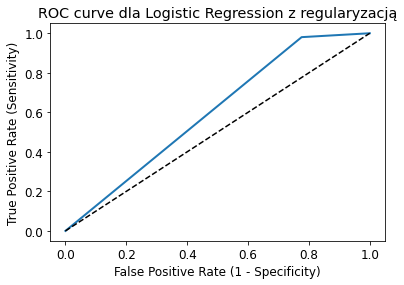

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, log1_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve dla Logistic Regression z regularyzacją')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Decision Tree

Pierwotnie dla max_depth = None głębokość wyszła 41 
wyniki: 
- max_depth = 41: {'f1-score': 0.89, 'accuracy': 0.81}
- max_depth = 30: {'f1-score': 0.89, 'accuracy': 0.82} 
- max_depth = 10: {'f1-score': 0.91, 'accuracy': 0.85}
- max_depth = 6: {'f1-score': 0.92, 'accuracy': 0.86}
- max_depth = 2: {'f1-score': 0.92, 'accuracy': 0.86} zostawiam na wartości 2. 

In [14]:
dtree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [15]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [17]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [18]:
dt_prediction = dtree.predict(X_test)

In [19]:
dtree_pr = evaluate(dt_prediction,y_test)
dtree_pr

# Summary of the prediction
print(classification_report(y_test, dt_prediction))
print(confusion_matrix(y_test, dt_prediction))
# Accuracy
print('Training accuracy:', dtree.score(X_train, y_train))
print('Test accuracy:', dtree.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.56      0.32      0.41      1978
           1       0.88      0.95      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.72      0.64      0.66     12761
weighted avg       0.83      0.86      0.84     12761

[[  632  1346]
 [  504 10279]]
Training accuracy: 0.8585342916638679
Test accuracy: 0.8550270354987853


In [20]:
auroc_dtree = roc_auc_score(dt_prediction,y_test)
print('AUROC =', auroc_dtree)

AUROC = 0.7202765409662275


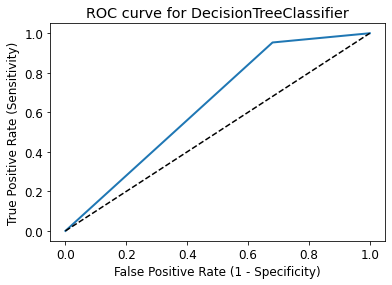

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, dt_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for DecisionTreeClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

[Text(167.4, 181.2, 'X[21] <= -0.3\ngini = 0.254\nsamples = 29774\nvalue = [4453, 25321]'),
 Text(83.7, 108.72, 'X[2] <= 0.545\ngini = 0.476\nsamples = 8780\nvalue = [3435, 5345]'),
 Text(41.85, 36.23999999999998, 'gini = 0.44\nsamples = 6201\nvalue = [2025, 4176]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.496\nsamples = 2579\nvalue = [1410, 1169]'),
 Text(251.10000000000002, 108.72, 'X[21] <= 0.01\ngini = 0.092\nsamples = 20994\nvalue = [1018, 19976]'),
 Text(209.25, 36.23999999999998, 'gini = 0.256\nsamples = 3936\nvalue = [592, 3344]'),
 Text(292.95, 36.23999999999998, 'gini = 0.049\nsamples = 17058\nvalue = [426, 16632]')]

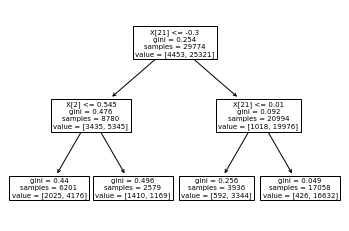

In [22]:
tree.plot_tree(dtree)

In [23]:
def get_depth(dtree):
    check_is_fitted(self)
    return dtree.tree_.max_depth
print('The maximum depth of the tree', dtree.tree_.max_depth)

The maximum depth of the tree 2


### Random Forest Classifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
rf_prediction = rf.predict(X_test)

In [27]:
rf_pr = evaluate(rf_prediction,y_test)
rf_pr

# Summary of the prediction
print(classification_report(y_test, rf_prediction))
print(confusion_matrix(y_test, rf_prediction))
# Accuracy
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.20      0.31      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.77      0.59      0.61     12761
weighted avg       0.84      0.86      0.83     12761

[[  393  1585]
 [  193 10590]]
Training accuracy: 1.0
Test accuracy: 0.8606692265496434


In [28]:
auroc_rf = roc_auc_score(rf_prediction,y_test)
print(auroc_rf)

0.7702318296178455


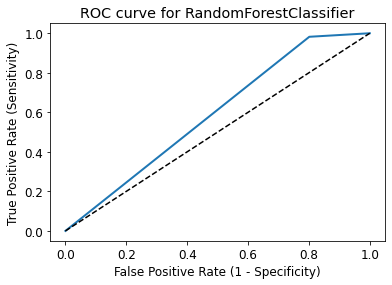

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, rf_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Support Vector Machine (SVM)

In [30]:
# model = SVC(C=100, random_state = 12)
supvm = SVC(C=1.0, kernel='linear', random_state = 12)

In [31]:
supvm.fit(X_train,y_train)

SVC(kernel='linear', random_state=12)

In [32]:
svm_prediction = supvm.predict(X_test)

In [33]:
svm_pr = evaluate(svm_prediction,y_test)
svm_pr
# Summary of the prediction
print(classification_report(y_test, svm_prediction))
print(confusion_matrix(y_test, svm_prediction))

# Accuracy
print('Training accuracy:', supvm.score(X_train, y_train))
print('Test accuracy:', supvm.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.66      0.08      0.14      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.75      0.54      0.53     12761
weighted avg       0.82      0.85      0.80     12761

[[  154  1824]
 [   81 10702]]
Training accuracy: 0.8556458655202526
Test accuracy: 0.8507170284460466


In [34]:
auroc_svm = roc_auc_score(svm_prediction,y_test)
print('AUROC =', auroc_svm)

AUROC = 0.754851016269139


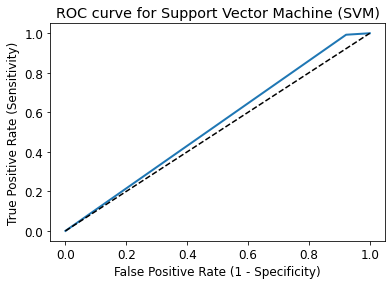

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, svm_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Support Vector Machine (SVM)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### K Nearest Neighbors (KNN)

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)

In [37]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [39]:
knn_prediction = knn.predict(X_test)

In [40]:
knn_pr = evaluate(knn_prediction,y_test)
knn_pr
# Summary of the prediction
print(classification_report(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))
# Accuracy
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.26      0.38      0.31      1978
           1       0.88      0.80      0.84     10783

    accuracy                           0.74     12761
   macro avg       0.57      0.59      0.57     12761
weighted avg       0.78      0.74      0.76     12761

[[ 752 1226]
 [2129 8654]]
Training accuracy: 0.9072009135487338
Test accuracy: 0.7370895697829324


In [41]:
auroc_knn = roc_auc_score(knn_prediction,y_test)
print('AUROC =', auroc_knn)

AUROC = 0.568465705087218


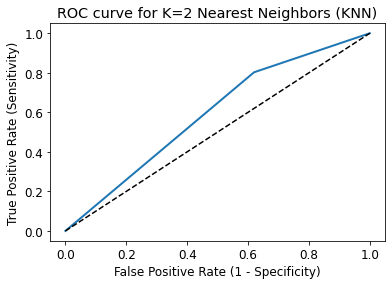

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, knn_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K=2 Nearest Neighbors (KNN)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

#### Szukamy optymalnej wartości k 

In [43]:
scores = [] 

for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_prediction = knn.predict(X_test)
    scores.append(accuracy_score(knn_prediction,y_test)) 
    print('n_neighbors=', scores)

n_neighbors= [0.7370895697829324]
n_neighbors= [0.7370895697829324, 0.8308126322388527]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639, 0.8352010030561868]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639, 0.8352010030561868, 0.8442911997492359]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639, 0.8352010030561868, 0.8442911997492359, 0.8423321056343547]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639, 0.8352010030561868, 0.8442911997492359, 0.8423321056343547, 0.8460935663349267]
n_neighbors= [0.7370895697829324, 0.8308126322388527, 0.814042786615469, 0.8405297390486639, 0.8352010030561868, 0.8442911997492359, 0.8423321056343547, 0.8460935663349267, 0

In [44]:
error_rate = [] 

max_k = 10

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_prediction = knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction != y_test))
print(error_rate)

[0.2104850717028446, 0.2629104302170676, 0.16918736776114723, 0.185957213384531, 0.1594702609513361, 0.16479899694381317, 0.15570880025076406, 0.15766789436564532, 0.15390643366507328]


Text(0, 0.5, 'Error Rate')

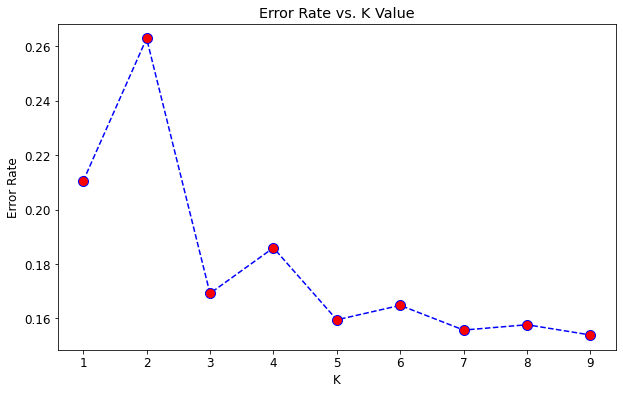

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1, max_k), error_rate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### sprawdź knn dla innej wartości k 

In [46]:
knn1 = KNeighborsClassifier()

In [47]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
knn1_prediction = knn.predict(X_test)

In [49]:
knn1_pr = evaluate(knn1_prediction,y_test)
knn1_pr
# Summary of the prediction
print(classification_report(y_test, knn1_prediction))
print(confusion_matrix(y_test, knn1_prediction))
# Accuracy
print('Training accuracy:', knn1.score(X_train, y_train))
print('Test accuracy:', knn1.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.54      0.05      0.10      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.69      0.52      0.51     12761
weighted avg       0.80      0.85      0.79     12761

[[  104  1874]
 [   90 10693]]
Training accuracy: 0.8720360045677437
Test accuracy: 0.8405297390486639


In [50]:
auroc_knn1 = roc_auc_score(knn1_prediction,y_test)
print('AUROC =', auroc_knn1)

AUROC = 0.6934808806241843


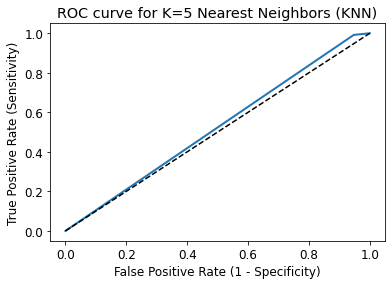

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, knn1_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for K=5 Nearest Neighbors (KNN)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Bagging Classifier

In [52]:
xgbc = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
xgbc.fit(X_train,y_train)
xgbc_prediction = xgbc.predict(X_test)

xgbc = evaluate(xgbc_prediction,y_test)
xgbc

# Summary of the prediction
print(classification_report(y_test, xgbc_prediction))
print(confusion_matrix(y_test, xgbc_prediction))

              precision    recall  f1-score   support

           0       0.51      0.41      0.46      1978
           1       0.90      0.93      0.91     10783

    accuracy                           0.85     12761
   macro avg       0.70      0.67      0.68     12761
weighted avg       0.84      0.85      0.84     12761

[[ 818 1160]
 [ 796 9987]]


In [53]:
auroc_xgbc = roc_auc_score(xgbc_prediction,y_test)
print('AUROC =', auroc_xgbc)

AUROC = 0.7013757459317187


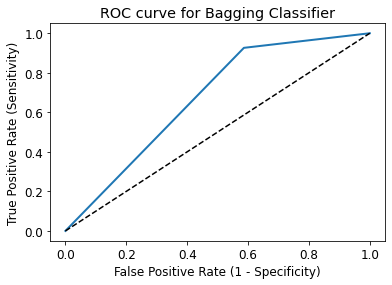

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, xgbc_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bagging Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### ADA Boost Classifier 

In [55]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)
ada_prediction = ada.predict(X_test)
print(classification_report(y_test, ada_prediction))
ada = evaluate(ada_prediction,y_test)
ada

# Summary of the prediction
print(classification_report(y_test, ada_prediction))
print(confusion_matrix(y_test, ada_prediction))

              precision    recall  f1-score   support

           0       0.59      0.32      0.41      1978
           1       0.88      0.96      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.74      0.64      0.67     12761
weighted avg       0.84      0.86      0.84     12761

              precision    recall  f1-score   support

           0       0.59      0.32      0.41      1978
           1       0.88      0.96      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.74      0.64      0.67     12761
weighted avg       0.84      0.86      0.84     12761

[[  629  1349]
 [  430 10353]]


In [56]:
auroc_ada = roc_auc_score(ada_prediction,y_test)
print('AUROC =', auroc_ada)

AUROC = 0.7393385616915116


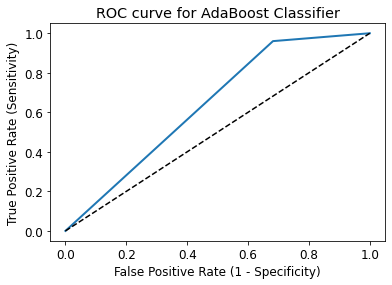

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, ada_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for AdaBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Gradient Boosting Classifier

In [58]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc.fit(X_train, y_train)
gbc_prediction = gbc.predict(X_test)
gbc = evaluate(gbc_prediction,y_test)
gbc

# Summary of the prediction
print(classification_report(y_test, gbc_prediction))
print(confusion_matrix(y_test, gbc_prediction))

              precision    recall  f1-score   support

           0       0.81      0.06      0.10      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.53      0.51     12761
weighted avg       0.85      0.85      0.79     12761

[[  110  1868]
 [   26 10757]]


In [59]:
auroc_gbc = roc_auc_score(gbc_prediction,y_test)
print('AUROC =', auroc_gbc)

AUROC = 0.8304315666860803


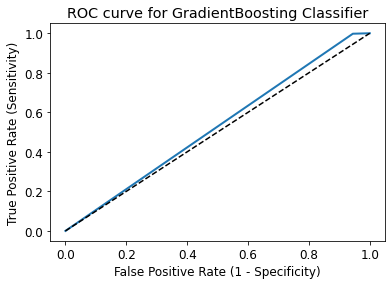

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, gbc_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for GradientBoosting Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### XGB Classifier

In [61]:
import xgboost as xgb 
xgb_clas=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_clas.fit(X_train, y_train)
xgb_clas_prediction = xgb_clas.predict(X_test)
xgb_clas = evaluate(xgb_clas_prediction,y_test)
xgb_clas

# Summary of the prediction
print(classification_report(y_test, xgb_clas_prediction))
print(confusion_matrix(y_test, xgb_clas_prediction))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42      1978
           1       0.89      0.97      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.76      0.64      0.67     12761
weighted avg       0.85      0.86      0.85     12761

[[  629  1349]
 [  374 10409]]


In [62]:
auroc_xgb_clas = roc_auc_score(xgb_clas_prediction,y_test)
print('AUROC =', auroc_xgb_clas)

AUROC = 0.7561941238709455


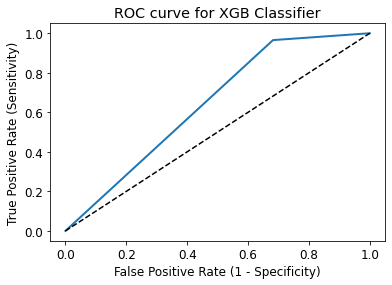

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_clas_prediction)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGB Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

### Porównanie wszystkich modeli na data_dummies 

In [64]:
results = pd.DataFrame({'Method':['Logistic Regression', 'Logistic Regression parameters','Decision Tree', 'Random Forest', 
                                  ' Support Vector Machine (SVM)', 'KNN', 'Bagging Classifier', 'ADA Boost Classifier', 
                                  'Gradient Boosting Classifier', 'XGB Classifier'], 
                        'AUROC': [auroc_log, auroc_lrc, auroc_dtree, auroc_rf, auroc_svm, 
                                  auroc_knn, auroc_xgbc, auroc_ada, auroc_gbc, auroc_xgb_clas]})
results.sort_values(by = 'AUROC', ascending = False)

,Method,AUROC
8,Gradient Boosting Classifier,0.830432
0,Logistic Regression,0.774249
1,Logistic Regression parameters,0.774249
3,Random Forest,0.770232
9,XGB Classifier,0.756194
4,Support Vector Machine (SVM),0.754851
7,ADA Boost Classifier,0.739339
2,Decision Tree,0.720277
6,Bagging Classifier,0.701376
5,KNN,0.568466


### Modele na całym zbiorze - data_loan1 - cechy numeryczne

#### Logistic Regression

In [65]:
X1 = data_loan1.drop('loan_status',axis=1) 
#target
y1 = data_loan1['loan_status']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [66]:
log_num = LogisticRegression()
log_num.fit(X1_train, y1_train)

y1_pred = log_num.predict(X1_test)

# Summary of the prediction
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.65      0.19      0.29      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.76      0.58      0.61     12761
weighted avg       0.83      0.86      0.82     12761

[[  372  1606]
 [  200 10583]]


In [67]:
auroc_log_num = roc_auc_score(xgb_clas_prediction,y_test)
print('AUROC =', auroc_log_num)

AUROC = 0.7561941238709455


#### Gradient Boosting Classifier

In [68]:
gbc_num= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc_num.fit(X1_train, y1_train)
gbc_num_pred = gbc_num.predict(X1_test)
gbc_num = evaluate(gbc_num_pred,y1_test)
gbc_num

# Summary of the prediction
print(classification_report(y1_test, gbc_num_pred))
print(confusion_matrix(y1_test, gbc_num_pred))

              precision    recall  f1-score   support

           0       0.82      0.03      0.05      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.51      0.49     12761
weighted avg       0.84      0.85      0.78     12761

[[   54  1924]
 [   12 10771]]


In [69]:
auroc_gbc_num = roc_auc_score(gbc_num_pred,y_test)
print('AUROC =', auroc_gbc_num)

AUROC = 0.8333130437896094


### Modele na całym zbiorze - data_outliers - z uzupełnionymi medianami

#### Logistic Regression

In [70]:
X2 = data_outliers 
#target
y2 = data_loan['loan_status']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [71]:
log_med = LogisticRegression()
log_med.fit(X2_train, y2_train)

y2_pred= log_med.predict(X2_test)

# Summary of the prediction
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.65      0.20      0.31      1978
           1       0.87      0.98      0.92     10783

    accuracy                           0.86     12761
   macro avg       0.76      0.59      0.62     12761
weighted avg       0.84      0.86      0.83     12761

[[  402  1576]
 [  217 10566]]


In [72]:
auroc_log_med = roc_auc_score(y2_pred,y2_test)
print('AUROC =', auroc_log_med)

AUROC = 0.7598185872133976


#### Gradient Boosting Classifier

In [73]:
gbc_med= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc_med.fit(X2_train, y2_train)
gbc_med_pred = gbc_med.predict(X2_test)
gbc_med = evaluate(gbc_med_pred,y2_test)
gbc_med

# Summary of the prediction
print(classification_report(y2_test, gbc_med_pred))
print(confusion_matrix(y2_test, gbc_med_pred))

              precision    recall  f1-score   support

           0       0.83      0.02      0.04      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.84      0.51      0.48     12761
weighted avg       0.85      0.85      0.78     12761

[[   44  1934]
 [    9 10774]]


In [74]:
auroc_gbc_med = roc_auc_score(gbc_med_pred,y_test)
print('AUROC =', auroc_gbc_med)

AUROC = 0.8390005404410236


### Podsumowanie 

Najlepsze wyniki AUROC uzyskałam na modelach Gradient Boosting Classifier, na wszystkich danych. Poniżej podsumowanie w zależności od rodzaje danych. 

In [75]:
results = pd.DataFrame({'Method':['Gradient Boosting Classifier','Gradient Boosting Classifier','Gradient Boosting Classifier'], 
                        'AUROC': [auroc_xgb_clas, auroc_gbc_num, auroc_gbc_med],
                       'Zbiór danych': ['data_dummies', 'data_loan numeryczne', 'data_loan z medianami']})
results.sort_values(by = 'AUROC', ascending = False)

,Method,AUROC,Zbiór danych
2,Gradient Boosting Classifier,0.839001,data_loan z medianami
1,Gradient Boosting Classifier,0.833313,data_loan numeryczne
0,Gradient Boosting Classifier,0.756194,data_dummies


### Kolejna część w pliku "Finalny Model część IV Projekt końcowy Data Science - Dorota Gawrońska-Popa"

### Łódź 4.10.2020